In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("finalmerged.csv")
data.head()

id                                            content
0  ffbxc48  An alternative economic model is needed, but N...
1  ffc5i6h  \*splutters tea everywhere\* The dude _owns_ t...
2  ff8z7yf  This is garbage.\n\nHalf of these aren't even ...
3  ff8znss  Hello, thank you for your comment. \nI am myse...
4  ff8i5we  It sounds great using wood and wooden building...

In [9]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
#from contractions import CONTRACTION_MAP
import unicodedata

In [10]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [11]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [15]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [12]:
import neattext as nt

In [16]:
def normalize_corpus(corpus, html_stripping=True, accented_char_removal=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = nt.remove_html_tags(doc)
            doc = nt.remove_urls(doc)
            doc = nt.remove_hashtags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)    
        
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        #if text_lemmatization:
        #    doc = lemmatize_text(doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [18]:
data = data.dropna()

In [19]:
data['clean_text'] = normalize_corpus(data['content'])

In [20]:
df = data.copy()

In [21]:
df= df.replace(r'\n',' ', regex=True)
df = df.replace(r'\\n',' ', regex=True)
df = df.replace(r'/r/',' ', regex=True)

In [22]:
df1 = df.copy()

In [23]:
df1 = df1.rename(columns={'clean_text':'body'})

In [24]:
df1 = df1.loc[df1["body"] != "[deleted]"]
df1 = df1.loc[df1["body"] != "[removed]"]
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Account age too young, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Not enough comment karma, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1 = df1.loc[df1["body"] != "Thank you!"]
df1 = df1.loc[df1["body"] != '!emissionsbot']
df1 = df1.loc[df1["body"] != 'Thank you']
df1 = df1.loc[df1["body"] != 'Thank you.']
df1 = df1.loc[df1["body"] != '/r/careerguidance']
df1 = df1.loc[df1["body"] != 'Thanks!']
df1 = df1.loc[df1["body"] != 'No']
df1 = df1.loc[df1["body"] != 'Lol']
df1 = df1.loc[df1["body"] != 'No.']
df1 = df1.loc[df1["body"] != 'Source?']
df1 = df1.loc[df1["body"] != 'x-post: /r/EnviroNews']
df1 = df1.loc[df1["body"] != 'Thank you!!!']
df1 = df1.loc[df1["body"] != '?']
df1 = df1.loc[df1["body"] != 'Thanks']
df1 = df1.loc[df1["body"] != 'Yes']
df1 = df1.loc[df1["body"] != 'Yes.']
df1 = df1.loc[df1["body"] != 'Thank you!!']
df1 = df1.loc[df1["body"] != ':(']
df1 = df1.loc[df1["body"] != '/r/Green does not allow image submissions.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*']
df1 = df1.loc[df1["body"] != 'Green  ']

In [25]:
slang_dict = {
"AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"OMG": "Surprised",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "ILU: I Love You",
"IMHO": "In My Honest / Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My Ass Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The Ass",
"PRT": "Party",
"PRW": "Parents Are Watching",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The Fuck",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait"
}

In [26]:
def slang(x):
    if type(x) is str:
        for key in slang_dict:
            value = slang_dict[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [27]:
df1.head()

id                                            content  \
0  ffbxc48  An alternative economic model is needed, but N...   
1  ffc5i6h  \*splutters tea everywhere\* The dude _owns_ t...   
2  ff8z7yf  This is garbage.  Half of these aren't even ne...   
3  ff8znss  Hello, thank you for your comment.  I am mysel...   
4  ff8i5we  It sounds great using wood and wooden building...   

                                                body  
0  An alternative economic model is needed, but N...  
1  \*splutters tea everywhere\* The dude _owns_ t...  
2  This is garbage.  Half of these aren't even ne...  
3  Hello, thank you for your comment.  I am mysel...  
4  It sounds great using wood and wooden building...

In [28]:
df1["body"] =df1["body"].apply(lambda x: slang(x))

In [29]:
contractions_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"here's": "here is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [30]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions_dict:
            value = contractions_dict[key]
            x = x.lower().replace(key,value)
        return x
    else:
        return x

In [31]:
df1["Cont-Exp"] =df1["body"].apply(lambda x: cont_to_exp(x))

In [34]:
import neattext.functions as nfx

In [35]:
def preprocess(df):
    
    df= df.apply(nfx.remove_urls)
    df= df.apply(nfx.remove_special_characters)
    df= df.apply(nfx.remove_emojis)
    df= df.apply(nfx.remove_numbers)
    df= df.apply(nfx.remove_puncts)
    df= df.apply(nfx.remove_hashtags)
    df= df.apply(nfx.remove_currencies)
    df= df.apply(lambda x: x.lower())
    df= df.apply(nfx.remove_multiple_spaces)
    df= df.apply(nfx.remove_stopwords)
    
    return df

In [36]:
df1["final"] =[each for each in preprocess(df1["Cont-Exp"])]
df1.head()

id                                            content  \
0  ffbxc48  An alternative economic model is needed, but N...   
1  ffc5i6h  \*splutters tea everywhere\* The dude _owns_ t...   
2  ff8z7yf  This is garbage.  Half of these aren't even ne...   
3  ff8znss  Hello, thank you for your comment.  I am mysel...   
4  ff8i5we  It sounds great using wood and wooden building...   

                                                body  \
0  An alternative economic model is needed, but N...   
1  \*splutters tea everywhere\* The dude _owns_ t...   
2  This is garbage.  Half of these aren't even ne...   
3  Hello, thank you for your comment.  I am mysel...   
4  It sounds great using wood and wooden building...   

                                            Cont-Exp  \
0  an alternative economic model is needed, but n...   
1  \*splutters tea everywhere\* the dude _owns_ t...   
2  this is garbage.  half of these are not / am n...   
3  hello, thank you for your comment.  i am mysel...   
4  it sounds great using wood and wooden building...   

                                               final  
0  alternative economic model needed native ameri...  
1  splutters tea dude owns duchy cornwall sure he...  
2  garbage half necessarily correct spell hair co...  
3  hello thank comment dedicated learn strive eco...  
4  sounds great wood wooden buildings look nice d...

# NER

In [39]:
new = pd.DataFrame(df1, columns = ["id","final"])

In [37]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [38]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [40]:
ent=new["final"].apply(lambda x : ner(x))

ent=[x for sub in ent for x in sub]

In [41]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [42]:
counter=Counter(ent)
count=counter.most_common()

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

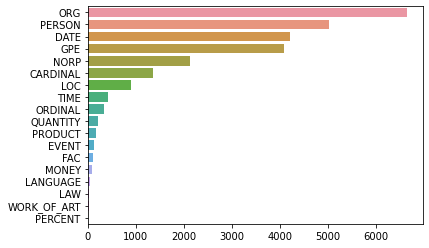

In [44]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

In [45]:
def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

In [46]:
org=new["final"].apply(lambda x: ner(x))
org=[i for x in org for i in x]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

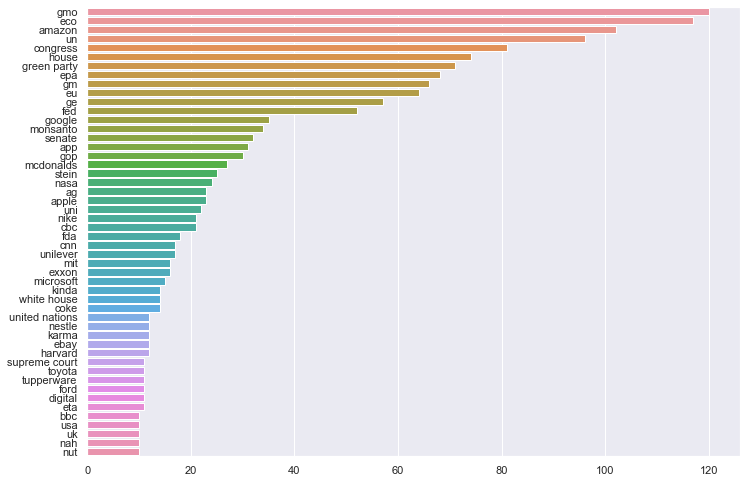

In [47]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

In [52]:
org = [i for i in org if i != "nah"]
org = [i for i in org if i != "kinda"]
org = [i for i in org if i != "green party"]
org = [i for i in org if i != "gmo"]
org = [i for i in org if i != "eco"]
org = [i for i in org if i != "un"]
org = [i for i in org if i != "congress"]
org = [i for i in org if i != "house"]
org = [i for i in org if i != "epa"]
org = [i for i in org if i != "eu"]
org = [i for i in org if i != "senate"]
org = [i for i in org if i != "gop"]
org = [i for i in org if i != "white house"]
org = [i for i in org if i != "digital"]
org = [i for i in org if i != "harvard"]
org = [i for i in org if i != "supreme court"]
org = [i for i in org if i != "app"]
org = [i for i in org if i != "nut"]
org = [i for i in org if i != "trump administration"]
org = [i for i in org if i != "fed"]
org = [i for i in org if i != "stein"]
org = [i for i in org if i != "ag"]
org = [i for i in org if i != "uni"]
org = [i for i in org if i != "fda"]
org = [i for i in org if i != "mit"]
org = [i for i in org if i != "united nations"]
org = [i for i in org if i != "eta"]
org = [i for i in org if i != "karma"]
org = [i for i in org if i != "cbc"]
org = [i for i in org if i != "cnn"]
org = [i for i in org if i != "coke"]
org = [i for i in org if i != "bbc"]
org = [i for i in org if i != "tupperware"]
org = [i for i in org if i != "usa"]
org = [i for i in org if i != "uk"]
org = [i for i in org if i != "usda"]
org = [i for i in org if i != "methane"]
org = [i for i in org if i != "npr"]
org = [i for i in org if i != "hahaha"]
org = [i for i in org if i != "meme"]
org = [i for i in org if i != "nd"]
org = [i for i in org if i != "veg"]
org = [i for i in org if i != "dnc"]
org = [i for i in org if i != "ga"]
org = [i for i in org if i != "dnc"]
org = [i for i in org if i != "doe"]
org = [i for i in org if i != "silicone"]
org = [i for i in org if i != "sierra club"]
org = [i for i in org if i != "phd"]
org = [i for i in org if i != "ems"]
org = [i for i in org if i != "sun"]
org = [i for i in org if i != "acc"]
org = [i for i in org if i != "democratic party"]
org = [i for i in org if i != "govt"]
org = [i for i in org if i != "nyc"]
org = [i for i in org if i != "rd party"]
org = [i for i in org if i != "s"]
org = [i for i in org if i != "copd"]
org = [i for i in org if i != "tomato"]
org = [i for i in org if i != "journal"]
org = [i for i in org if i != "biodiesel"]
org = [i for i in org if i != "boil"]
org = [i for i in org if i != "pentagon"]
org = [i for i in org if i != "iea"]
org = [i for i in org if i != "tpp"]
org = [i for i in org if i != "nec"]
org = [i for i in org if i != "fibre"]
org = [i for i in org if i != "bum"]
org = [i for i in org if i != "pla"]
org = [i for i in org if i != "new york times"]
org = [i for i in org if i != "doc"]
org = [i for i in org if i != "columbia"]
org = [i for i in org if i != "dea"]
org = [i for i in org if i != "globe"]
org = [i for i in org if i != "diet"]
org = [i for i in org if i != "nasa"]
org = [i for i in org if i != "wtf"]
org = [i for i in org if i != "republican party"]
org = [i for i in org if i != "stanford"]
org = [i for i in org if i != "pruitt"]
org = [i for i in org if i != "summary"]
org = [i for i in org if i != "ac"]

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

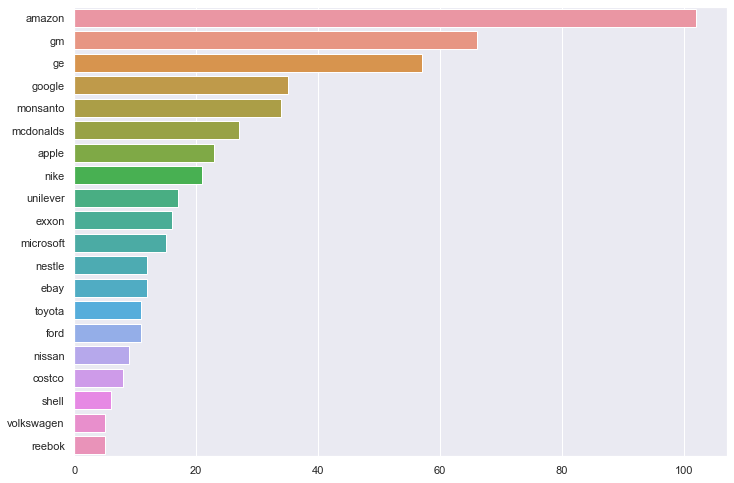

In [53]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(20)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

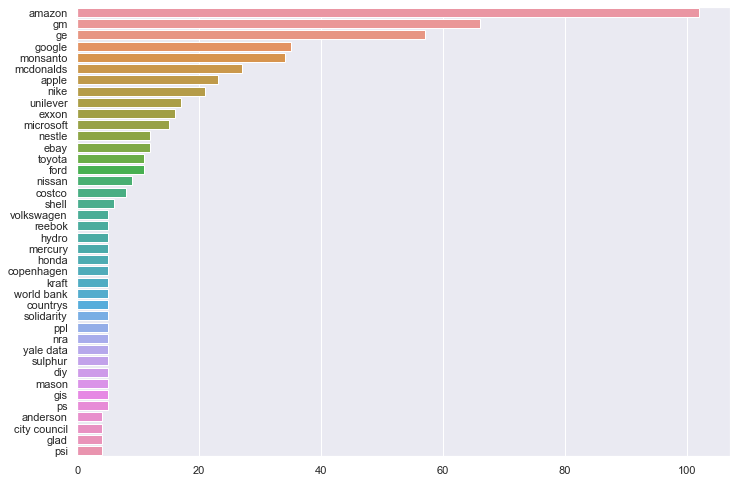

In [285]:
counter=Counter(org)
x,y=map(list,zip(*counter.most_common(40)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

# A. Adjusting Dataset only for ZeroShot Classification

In [54]:
df1.head()

id                                            content  \
0  ffbxc48  An alternative economic model is needed, but N...   
1  ffc5i6h  \*splutters tea everywhere\* The dude _owns_ t...   
2  ff8z7yf  This is garbage.  Half of these aren't even ne...   
3  ff8znss  Hello, thank you for your comment.  I am mysel...   
4  ff8i5we  It sounds great using wood and wooden building...   

                                                body  \
0  An alternative economic model is needed, but N...   
1  \*splutters tea everywhere\* The dude _owns_ t...   
2  This is garbage.  Half of these aren't even ne...   
3  Hello, thank you for your comment.  I am mysel...   
4  It sounds great using wood and wooden building...   

                                            Cont-Exp  \
0  an alternative economic model is needed, but n...   
1  \*splutters tea everywhere\* the dude _owns_ t...   
2  this is garbage.  half of these are not / am n...   
3  hello, thank you for your comment.  i am mysel...   
4  it sounds great using wood and wooden building...   

                                               final  
0  alternative economic model needed native ameri...  
1  splutters tea dude owns duchy cornwall sure he...  
2  garbage half necessarily correct spell hair co...  
3  hello thank comment dedicated learn strive eco...  
4  sounds great wood wooden buildings look nice d...

In [235]:
df1.shape

(32357, 5)

### Creating a column by removing only url-related texts

In [236]:
df1["body2"] = df1["content"].apply(nfx.remove_urls)
df1["body2"] = df1["body2"].apply(nfx.remove_hashtags)
df1["body2"] = df1["body2"].apply(nfx.remove_html_tags)


In [237]:
def add_text_length(data, column):
    dtf = data.copy()
    dtf['word_count'] = dtf[column].apply(lambda x: len(nltk.word_tokenize(str(x))) )
    dtf['char_count'] = dtf[column].apply(lambda x: sum(len(word) for word in nltk.word_tokenize(str(x))) )
    dtf['sentence_count'] = dtf[column].apply(lambda x: len(nltk.sent_tokenize(str(x))) )
    dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']
    dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']
    print(dtf[['char_count','word_count','sentence_count','avg_word_length','avg_sentence_lenght']].describe().T[["min","mean","max"]])
    return dtf

In [239]:
df2 = df1.copy()

In [240]:
df2= pd.DataFrame(df2, columns = ["id","body2"])

In [241]:
dtf = add_text_length(df2, "body2")
dtf = dtf.sort_values("word_count",ascending=False)
dtf.head()

                     min        mean      max
char_count           0.0  210.057638  12199.0
word_count           0.0   50.392465   3206.0
sentence_count       0.0    2.972556    361.0
avg_word_length      1.0    4.344531     94.0
avg_sentence_lenght  1.0   14.662861    173.0


id                                              body2  word_count  \
28036   eikj2g  Signs of Collapse - Summary of the year Hi  Su...        3206   
24096   apkzl7  Will Sustainability Kill or Enslave Us All? Pa...        2211   
6250   cyvonav  Fukushima also released 13.5PBq (304 g) of Cs-...        1773   
2986   do94r36  > The limiting factor in any marine-based farm...        1738   
2990   do9b9fw  Not within the upper waters near where sunligh...        1681   

       char_count  sentence_count  avg_word_length  avg_sentence_lenght  
28036       12199              21         3.805053           152.666667  
24096        8789              85         3.975124            26.011765  
6250         7223              54         4.073886            32.833333  
2986         7058              66         4.060990            26.333333  
2990         7230              80         4.301011            21.012500

### 1.Amazon Data

In [242]:
amazon = df2[df2['body2'].str.contains('amazon', regex=False, case=False, na=False)]

In [243]:
print(amazon.shape)
amazon.head()

(178, 2)


id                                              body2
97   fcvrcvq  SEATTLE — Amazon has warned at least two emplo...
225  f9dz4lj  Even though Amazon now gives you a choice of c...
457  f2vwz5z  I dont think so. If at all it echoes a society...
540  ezfh51v  This data compares to 2002 — but they were alr...
828  esl7b6z  The tragedy is that the Amazon is being cut do...

### 2. General Motors Data (THIS IS WRONG, DELETE GM BECAUSE GM=Genetically modified)

In [254]:
gm = df2[df2['body2'].str.contains('GM', regex=False, na=False)]

In [263]:

gm = gm[gm["body2"].str.contains("GMT")==False]
gm = gm[gm["body2"].str.contains("GMOs")==False]
gm = gm[gm["body2"].str.contains("GMO")==False]
gm = gm[gm["body2"].str.contains("Non-GM")==False]
gm = gm[gm["body2"].str.contains("Anti-GM")==False]

print(gm.shape)
gm.head()

(29, 2)


id                                              body2
5325  d54sot2  Why not do both? Find these plants, then say, ...
5719  d2b22n8  I'm aware that organic and GM are not 2 sides ...
5720  d2b22sh  I can't see how this affects the number of GM ...
5829  d1ofcqz  >The spread of GM crops has caused a dramatic ...
6151  czila65  You are citing a conspiracy theory website.  T...

In [264]:
gm["body2"][5325]

'Why not do both? Find these plants, then say, GM them to process more CO2 or something.'

### 3. General Electric Data

In [272]:
ge = df2[df2['body2'].str.match('GE')]
print(ge.shape)
ge.head()

(5, 2)


id                                              body2
13459  eppp058  GE, siemans, my advice would be to go to one o...
13647  eq0vkof  GE doesnt CAUSE monocropping per say. You coul...
23381   cn4yf3  GET A UNIVERSAL NON INTERSECTING NAME FOR THE ...
23614   c3bn2m  GE and Atlantis tie up for ‘300TW’ global tida...
25553   70ltr2  GE Renewable Energy Unveils Largest Onshore Wi...

In [277]:
ge["body2"][25553]

'GE Renewable Energy Unveils Largest Onshore Wind Turbine  '

### 4. Google

In [279]:
google = df2[df2['body2'].str.contains('google', regex=False, case=False, na=False)]
print(google.shape)
google.head()

(224, 2)


id                                              body2
97    fcvrcvq  SEATTLE — Amazon has warned at least two emplo...
571   ey8lk71  The link above has the video's transcript and ...
2153  e32edsy  Just Google crops grown for livestock. It's si...
2158  e32gc3c  >Just Google crops grown for livestock.   Sure...
2249  e16bats  Google says it's fine for your plants, even re...

In [281]:
google["body2"][571]

"The link above has the video's transcript and serves the video from Democracy Now's server.  You can also [watch the report on Google/Alphabet's YouTube here]().  Democracy Now's full intro:  > Billionaire conservative donor David Koch died Friday at the age of 79 from prostate cancer. David Koch — who was worth some $42 billion — and his brother Charles poured massive amounts of money into funding climate change denial through conservative think tanks and politicians. The Koch brothers founded the political advocacy group Americans for Prosperity in 2004, which is credited with turning the “tea party” into a full-fledged political movement. They also backed “right-to-work” efforts, which aim to weaken labor rights and quash union membership. The brothers made their fortune running Koch Industries, the second-largest privately held company in the United States. We speak with the business journalist Christopher Leonard, who just last week published a major new book examining the busine

### 5. Monsanto

In [286]:
monsanto = df2[df2['body2'].str.contains('monsanto', regex=False, case=False, na=False)]
print(monsanto.shape)
monsanto.head()

(85, 2)


id                                              body2
2075  e4805n2  The India case is interesting. The courts have...
2078  e4448ml  Here are some other articles about this story:...
2309  e083wqz  It's just as easy to say FUCK BAYER!!! as is i...
3149  dl92e1k  Cue the Monsanto shills that plague reddit at ...
3151  dl935nj  I worked for Monsanto years ago, it's not exac...

In [287]:
monsanto["body2"][2078]

"Here are some other articles about this story:  * chron.com: [Jury finds Monsanto liable in the first Roundup cancer trial – here's what could happen next]() * investors.com: [Bayer Dives After Monsanto Loses Roundup Cancer Trial]() * nasdaq.com: [Bayer shares fall 10 pct after Monsanto's Roundup cancer trial]() * reuters.com: [Bayer shares fall 10 percent after Monsanto's Roundup cancer trial]() * wsj.com: [Bayer Shares Plunge After Monsanto Weed Killer Ruling]() * abc13.com: [Jury awards $289M to man who blames Roundup weed killer for cancer]() * cbsnews.com: [Bayer shares slump after $289M Monsanto Roundup verdict]() * kmov.com: [Jurors give $289 million to a man they say got cancer from Monsanto's Roundup weedkiller]() * phys.org: [Five things to know about Bayer and Monsanto]() * bloomberg.com: [All of Monsanto's Problems Just Landed on Bayer]() * washingtonpost.com: [Bayer stock plunges after jury decides Roundup gave one man terminal cancer]() * farmfutures.com: [Bayer shares p

### 6. McDonalds

In [288]:
mcdonalds = df2[df2['body2'].str.contains('mcdonalds', regex=False, case=False, na=False)]
print(mcdonalds.shape)
mcdonalds.head()

(23, 2)


id                                              body2
930   eqbqmi2                                   McDonalds + time
2729  dsw263p  I love how the author needs to establish that ...
7697  fcbx558  > while they grow their business at the expens...
7726  fcahzpv  Here's the dirtiest secret in all of "sustaina...
7861  fch4esx  "I help the planet because im vegan" half, or ...

### 7. Apple

In [289]:
apple = df2[df2['body2'].str.contains('apple', regex=False, case=False, na=False)]
print(apple.shape)
apple.head()

(96, 2)


id                                              body2
1785  e9dlu2n  Firstly I would like to say that I wholehearte...
3387  divviyi  Apple has 800 billion in the bank could stop 3...
3391  diveyjo  Everything is not black or white. Even if you ...
5142  d5spow0  apples (and other fruit) are already hand poll...
5286  d5bnxw3  Nonsense. All of those things happen with or w...

### 8. Nike

In [290]:
nike = df2[df2['body2'].str.contains('nike', regex=False, case=False, na=False)]
print(nike.shape)
nike.head()

(26, 2)


id                                              body2
1362  eh2w266  Thanks for reading! I never did intend to impl...
1856  e84e8fm  I wonder how much better this Wado company is ...
1858  e853y9t  That's a fair point, there's no way that was p...
1859  e88kxkm  One thing I'll give credit to Nike for, though...
7896  fc0pset  No, more sustainable practices doesn't automat...

In [291]:
nike["body2"][1362]

'Thanks for reading! I never did intend to imply that macro-level policies are doomed to fail - quite the opposite - I agree that they are necessary for people to succeed. The article is showing us that the mainstream plans to fix our problems are at best misguided and at worst treasonous behavior.   I totally understand your virtue signal point. But, if you don\'t think that buying shoes from a local cobbler of local materials is better than buying from nike slave trade shoes - I will just fundamentally disagree with you right there. The world is fucked BOTH cause of poor macro-level planning AND people using \'virtue signals\' and not making decisions that cause LESS harm.  To be blunt - policy is not inherently evil - any policy that is not transparent, could lead to a debt crisis, or forces a country to take the least efficient option is a weaponization of sustainability. I see things going down this road. This is the only reason I\'m raising flags. Carte-blanche borrowing from the

### 9. Unilever

In [292]:
unilever = df2[df2['body2'].str.contains('unilever', regex=False, case=False, na=False)]
print(unilever.shape)
unilever.head()

(26, 2)


id                                              body2
10107  f2zqd7c                                     Fuck UniLever!
11115  eym8s6n  Isn't Seventh Generation owned by Unilever? An...
11127  eymzmkh                    Unilever ruins the party again.
11128  eymfw1w  It was my understanding that Unilever bought S...
11133  eyo20hy  I believe Unilever made it, and the only reaso...

### 10.Exxon

In [283]:
exxon = df2[df2['body2'].str.contains('exxon', regex=False, case=False, na=False)]
print(exxon.shape)
exxon.head()

(26, 2)


id                                              body2
278   f7xiuon  "Hey kids, no need to reduce your emissions or...
287   f7y3cqq  Oh yes, sorry, wasn't implying the researchers...
727   eu1y4te     Than previously told to us by Exxon? No way???
3845  dedntqf  Yea, I'm just curious if the video was ever re...
4340  da98yo5  Organic is the only term that's regulated. Nat...

### 11. Microsoft 

In [293]:
microsoft = df2[df2['body2'].str.contains('microsoft', regex=False, case=False, na=False)]
print(microsoft.shape)
microsoft.head()

(20, 2)


id                                              body2
19    fenk3p1  Dude the fact they are doing it is amazing, wh...
21    ff91scj  I agree it’s great news and it’s better than d...
97    fcvrcvq  SEATTLE — Amazon has warned at least two emplo...
1048  emj9n1c  Cool. But I have a few questions. Why is this ...
8873  f8bzcua  This is how they work and it's genius (for now...

### 12. Nestle

In [294]:
nestle = df2[df2['body2'].str.contains('nestle', regex=False, case=False, na=False)]
print(nestle.shape)
nestle.head()

(29, 2)


id                                              body2
318   f7au60d  There is literally nothing that would make me ...
6659  feuj2q9  Its unethical and unsustainable, especially wh...
7847  fc42fs9  We can all do our part but we all know it’s ul...
8027  fbatof5  Need to throw almonds in there for all the "bu...
8053  fbau9h8  Meanwhile, ~~every animal source of food~~beef...

In [295]:
nestle["body2"][318]

'There is literally nothing that would make me buy anything from Nestle. They can go bankrupt as far as I care. Them going "green" with their packaging doesn\'t make for all the rest of the terrible things they do.'

In [296]:
nestle["body2"][6659]

"Its unethical and unsustainable, especially when you look into what water companies have done, from nestle during California's droughts to coca-cola companies in Africa, And then how they bottle it with single use plastics.. its certainly not sustainable at all. Invest in rainwater collection and water purifiers instead."

# B. ZERO-SHOT

Actually, the latest implementations of zero-shot text classification born out of a very simple but brilliant idea. There is a field called Natural Language Inference (NLI) in NLP. This field investigates whether a hypothesis is true (entailment), false (contradiction), or undetermined (neutral) for a given premise.

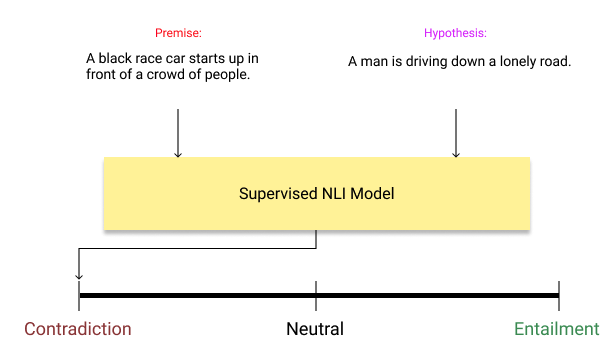

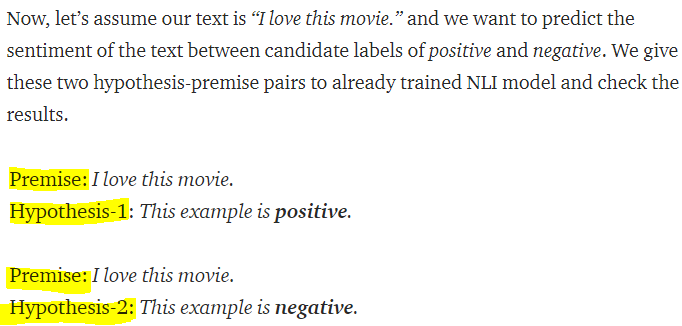

Thanks to HuggingFace, it can be easily used through the pipeline module.

Zero-shot classification looks promising in these examples. However, its performance should be evaluated with correct measurements by using already labeled examples.

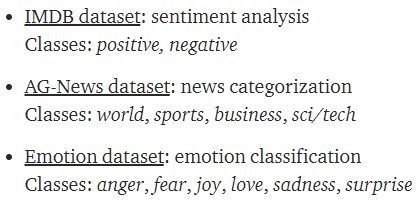

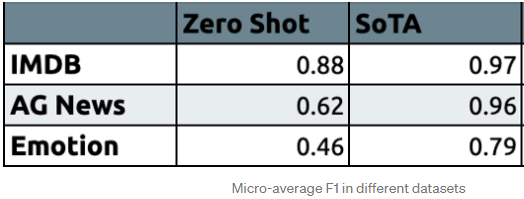

We can see that zero-shot text classification performs significant results in sentiment analysis and news categorization. The performance in the emotion classification with 6 class is rather poor. I believe that it might be due to the similarity between classes. It is a very hard task to make a distinction between joy, love, and surprise classes without any prior data.

In [308]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-distilroberta-base')

### GoEmotions: A Dataset of Fine-Grained Emotions

Understanding emotion expressed in language
has a wide range of applications, from building empathetic chatbots to detecting harmful
online behavior. Advancement in this area can
be improved using large-scale datasets with
a fine-grained typology, adaptable to multiple downstream tasks. We introduce GoEmotions, the largest manually annotated dataset
of 58k English Reddit comments, labeled for
27 emotion categories or Neutral. We demonstrate the high quality of the annotations via
Principal Preserved Component Analysis. We
conduct transfer learning experiments with existing emotion benchmarks to show that our
dataset generalizes well to other domains and
different emotion taxonomies. Our BERTbased model achieves an average F1-score of
.46 across our proposed taxonomy, leaving
much room for improvement.

In [309]:
# REFERENCE: https://arxiv.org/pdf/2005.00547.pdf , GoEmotionDataset

LABELS = [
    'admiration',
    'amusement',
    'anger',
    'annoyance',
    'approval',
    'caring',
    'confusion',
    'curiosity',
    'desire',
    'disappointment',
    'disapproval',
    'disgust',
    'embarrassment',
    'excitement',
    'fear',
    'gratitude',
    'grief',
    'joy',
    'love',
    'nervousness',
    'optimism',
    'pride',
    'realization',
    'relief',
    'remorse',
    'sadness',
    'surprise',
    'neutral',
]

In [95]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch


In [96]:
model = AutoModelForSequenceClassification.from_pretrained('cross-encoder/nli-distilroberta-base')
tokenizer = AutoTokenizer.from_pretrained('cross-encoder/nli-distilroberta-base')


### 1.ZeroShot for AMAZON

In [303]:
amazon = amazon.assign(var1=amazon["body2"].str.split(".")).explode("body2")
amazon.head()

id                                              body2  \
97   fcvrcvq  SEATTLE — Amazon has warned at least two emplo...   
225  f9dz4lj  Even though Amazon now gives you a choice of c...   
457  f2vwz5z  I dont think so. If at all it echoes a society...   
540  ezfh51v  This data compares to 2002 — but they were alr...   
828  esl7b6z  The tragedy is that the Amazon is being cut do...   

                                                  var1  
97   [SEATTLE — Amazon has warned at least two empl...  
225  [Even though Amazon now gives you a choice of ...  
457  [I dont think so,  If at all it echoes a socie...  
540  [This data compares to 2002 — but they were al...  
828  [The tragedy is that the Amazon is being cut d...

In the below code, I removed the empty items in the ist because ZEROSHOT doesn't work if there is any empty item in list.

In [304]:
amazon_strings = []
for each in amazon["var1"]:
    for string in each:
        if (string != ""):
            amazon_strings.append(string)  

In [305]:
amazon_strings

['SEATTLE — Amazon has warned at least two employees who publicly criticized the company’s environmental policies that they could be fired for future violations of its communications policy',
 '  A lawyer in the e-commerce giant’s employee-relations group sent a letter to two workers quoted in an October Washington Post report, accusing them of violating the company’s external communications policy',
 ' An email sent to Maren Costa, a principal user-experience designer at the company, and reviewed by The Post warned that future infractions could “result in formal corrective action, up to and including termination of your employment with Amazon',
 '”  The lawyer in the human resources group, Eric Sjoding, advised Costa in the Nov',
 ' 22 email to “review the policy again and in the future anytime you may consider speaking about Amazon’s business in a public forum',
 '”  Costa and Jamie Kowalski, an Amazon software development engineer, told The Post in a joint statement in October that 

In [306]:
len(amazon_strings)

1163

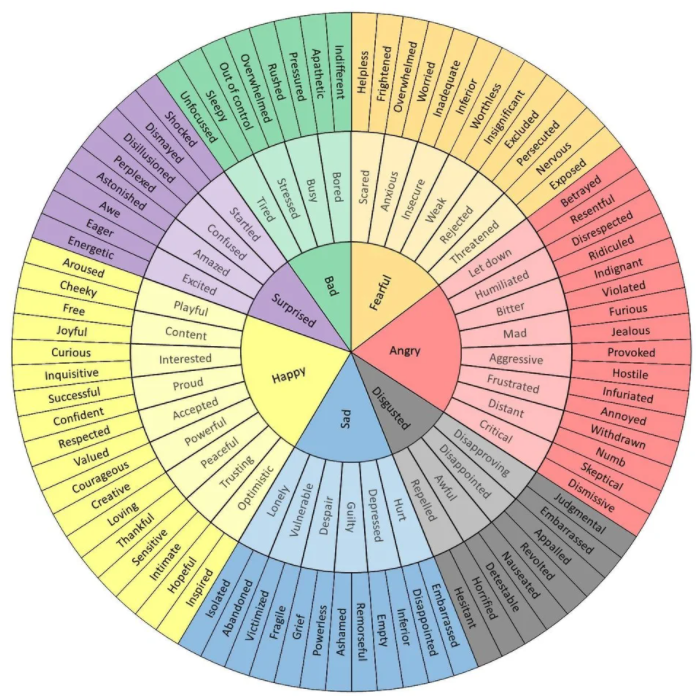

In [310]:
%time amazon_cls = classifier(amazon_strings, LABELS)
print(amazon_cls)

Wall time: 8min 7s
[{'sequence': 'SEATTLE — Amazon has warned at least two employees who publicly criticized the company’s environmental policies that they could be fired for future violations of its communications policy', 'labels': ['disapproval', 'fear', 'anger', 'confusion', 'annoyance', 'disappointment', 'realization', 'nervousness', 'desire', 'embarrassment', 'surprise', 'curiosity', 'grief', 'sadness', 'remorse', 'disgust', 'caring', 'amusement', 'approval', 'excitement', 'admiration', 'pride', 'neutral', 'gratitude', 'love', 'relief', 'optimism', 'joy'], 'scores': [0.38255277276039124, 0.05832008272409439, 0.055508922785520554, 0.05037756264209747, 0.04730939120054245, 0.04602157324552536, 0.03960220515727997, 0.0386926531791687, 0.027177315205335617, 0.025962546467781067, 0.023910967633128166, 0.02250603586435318, 0.021273376420140266, 0.021067148074507713, 0.01619543507695198, 0.015994524583220482, 0.014837064780294895, 0.014698945917189121, 0.01298114750534296, 0.01074134279

In [224]:
def get_label_score_dict(row, threshold):
    result_dict = dict()
    for _label, _score in zip(row['labels'], row['scores']):
        if _score > threshold:
            result_dict.update({_label: 1})
        else:
            result_dict.update({_label: 0})
    return result_dict

In [311]:
th = 0.1    #whatever threshold value you want
amazon_result = list(map(lambda x: get_label_score_dict(x, th), amazon_cls))
amazon_result_df = pd.DataFrame(amazon_result)

In [312]:
amazon_result_df.shape

(1163, 28)

In [313]:
# Remove rows with all 0s in a Dataframe
amazon_result_df= amazon_result_df.loc[(amazon_result_df != 0).any(axis=1)]
print(amazon_result_df.shape)
print(amazon_result_df)

(1077, 28)
      disapproval  fear  anger  confusion  annoyance  disappointment  \
0               1     0      0          0          0               0   
1               1     0      0          0          0               0   
3               0     0      0          0          0               0   
4               0     0      0          0          0               0   
5               0     0      0          0          0               0   
6               0     0      0          0          0               0   
7               0     1      0          0          0               0   
8               0     1      0          0          0               0   
9               0     0      0          0          0               0   
11              1     0      0          1          0               0   
12              0     0      0          0          0               0   
13              0     0      0          0          0               0   
14              1     0      0          0          0 

In [314]:
emotions_map = {}
for i,emotion in enumerate(amazon_result_df):
    emotions_map[str(i)] = emotion.strip()

In [315]:
emotions_map

{'0': 'disapproval',
 '1': 'fear',
 '2': 'anger',
 '3': 'confusion',
 '4': 'annoyance',
 '5': 'disappointment',
 '6': 'realization',
 '7': 'nervousness',
 '8': 'desire',
 '9': 'embarrassment',
 '10': 'surprise',
 '11': 'curiosity',
 '12': 'grief',
 '13': 'sadness',
 '14': 'remorse',
 '15': 'disgust',
 '16': 'caring',
 '17': 'amusement',
 '18': 'approval',
 '19': 'excitement',
 '20': 'admiration',
 '21': 'pride',
 '22': 'neutral',
 '23': 'gratitude',
 '24': 'love',
 '25': 'relief',
 '26': 'optimism',
 '27': 'joy'}

In [316]:
emotion_list = list(emotions_map.values())

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

from wordcloud import WordCloud
from IPython.display import Image

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [322]:
temp_list = amazon_result_df.sum(axis=0).tolist()

In [323]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### 2. ZeroShot for GOOGLE

In [324]:
google.head()

id                                              body2
97    fcvrcvq  SEATTLE — Amazon has warned at least two emplo...
571   ey8lk71  The link above has the video's transcript and ...
2153  e32edsy  Just Google crops grown for livestock. It's si...
2158  e32gc3c  >Just Google crops grown for livestock.   Sure...
2249  e16bats  Google says it's fine for your plants, even re...

In [325]:
google = google.assign(var1=google["body2"].str.split(".")).explode("body2")
google.head()

id                                              body2  \
97    fcvrcvq  SEATTLE — Amazon has warned at least two emplo...   
571   ey8lk71  The link above has the video's transcript and ...   
2153  e32edsy  Just Google crops grown for livestock. It's si...   
2158  e32gc3c  >Just Google crops grown for livestock.   Sure...   
2249  e16bats  Google says it's fine for your plants, even re...   

                                                   var1  
97    [SEATTLE — Amazon has warned at least two empl...  
571   [The link above has the video's transcript and...  
2153  [Just Google crops grown for livestock,  It's ...  
2158  [>Just Google crops grown for livestock,    Su...  
2249  [Google says it's fine for your plants, even r...

In [326]:
google_strings = []
for each in google["var1"]:
    for string in each:
        if (string != ""):
            google_strings.append(string)  

In [327]:
len(google_strings)

1360

In [328]:
%time google_cls = classifier(google_strings, LABELS)
print(google_cls)

Wall time: 8min 30s
[{'sequence': 'SEATTLE — Amazon has warned at least two employees who publicly criticized the company’s environmental policies that they could be fired for future violations of its communications policy', 'labels': ['disapproval', 'fear', 'anger', 'confusion', 'annoyance', 'disappointment', 'realization', 'nervousness', 'desire', 'embarrassment', 'surprise', 'curiosity', 'grief', 'sadness', 'remorse', 'disgust', 'caring', 'amusement', 'approval', 'excitement', 'admiration', 'pride', 'neutral', 'gratitude', 'love', 'relief', 'optimism', 'joy'], 'scores': [0.38255277276039124, 0.05832008272409439, 0.055508922785520554, 0.05037756264209747, 0.04730939120054245, 0.04602157324552536, 0.03960220515727997, 0.0386926531791687, 0.027177315205335617, 0.025962546467781067, 0.023910967633128166, 0.02250603586435318, 0.021273376420140266, 0.021067148074507713, 0.01619543507695198, 0.015994524583220482, 0.014837064780294895, 0.014698945917189121, 0.01298114750534296, 0.0107413427

In [339]:
th = 0.1    #whatever threshold value you want
google_result = list(map(lambda x: get_label_score_dict(x, th), google_cls))
google_result_df = pd.DataFrame(google_result)
print(google_result_df.shape)

(1360, 28)


In [340]:
emotions_map = {}
for i,emotion in enumerate(google_result_df):
    emotions_map[str(i)] = emotion.strip()

In [341]:
emotion_list = list(emotions_map.values())

In [342]:
temp_list =google_result_df.sum(axis=0).tolist()

In [343]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

#### Comparison with 'facebook/bart-large-mnli'

In [352]:
classifier_fb = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli")

In [370]:
%time google_cls_fb = classifier_fb(google_strings, LABELS)
print(google_cls_fb)

Wall time: 59min 58s
[{'sequence': 'SEATTLE — Amazon has warned at least two employees who publicly criticized the company’s environmental policies that they could be fired for future violations of its communications policy', 'labels': ['disapproval', 'surprise', 'fear', 'disappointment', 'realization', 'desire', 'nervousness', 'embarrassment', 'confusion', 'anger', 'annoyance', 'remorse', 'grief', 'caring', 'disgust', 'approval', 'sadness', 'neutral', 'relief', 'excitement', 'curiosity', 'pride', 'amusement', 'joy', 'admiration', 'optimism', 'gratitude', 'love'], 'scores': [0.35380053520202637, 0.08173339068889618, 0.08104871958494186, 0.04715414345264435, 0.0446808747947216, 0.03970856964588165, 0.03663494810461998, 0.03132810443639755, 0.03074847348034382, 0.028924953192472458, 0.027783220633864403, 0.027156488969922066, 0.024342065677046776, 0.020433980971574783, 0.018867187201976776, 0.018323268741369247, 0.01305101253092289, 0.010916445404291153, 0.010221634991466999, 0.009122132

In [371]:
th = 0.1    #whatever threshold value you want
google_result_fb = list(map(lambda x: get_label_score_dict(x, th), google_cls_fb))
google_result_df_fb = pd.DataFrame(google_result_fb)
print(google_result_df_fb.shape)

(1360, 28)


In [372]:
emotions_map_fb = {}
for i,emotion in enumerate(google_result_df_fb):
    emotions_map_fb[str(i)] = emotion.strip()

In [373]:
emotion_list_fb = list(emotions_map_fb.values())
temp_list_fb =google_result_df_fb.sum(axis=0).tolist()

In [374]:
trace1 = go.Bar(
                x = emotion_list_fb,
                y = temp_list_fb,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list_fb, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

#### Comparison with 'bart-large-mnli-yahoo-answers'

In [387]:
classifier_yahoo = pipeline("zero-shot-classification", model="joeddav/bart-large-mnli-yahoo-answers")

Downloading:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [357]:
x_strings = []
for each in samples["var1"]:
    for string in each:
        if (string != ""):
            x_strings.append(string) 

In [391]:
%time output = classifier_yahoo(x_strings, LABELS)

Wall time: 8min 1s


In [393]:
%time output = classifier(x_strings, LABELS)

Wall time: 1min 32s


### 3. ZeroShot for Monsanto

In [402]:
print(monsanto.shape)
monsanto.head()

(85, 3)


id                                              body2  \
2075  e4805n2  The India case is interesting. The courts have...   
2078  e4448ml  Here are some other articles about this story:...   
2309  e083wqz  It's just as easy to say FUCK BAYER!!! as is i...   
3149  dl92e1k  Cue the Monsanto shills that plague reddit at ...   
3151  dl935nj  I worked for Monsanto years ago, it's not exac...   

                                                   var1  
2075  [The India case is interesting,  The courts ha...  
2078  [Here are some other articles about this story...  
2309  [It's just as easy to say FUCK BAYER!!! as is ...  
3149  [Cue the Monsanto shills that plague reddit at...  
3151  [I worked for Monsanto years ago, it's not exa...

In [403]:
monsanto = monsanto.assign(var1=monsanto["body2"].str.split(".")).explode("body2")
monsanto.head()

id                                              body2  \
2075  e4805n2  The India case is interesting. The courts have...   
2078  e4448ml  Here are some other articles about this story:...   
2309  e083wqz  It's just as easy to say FUCK BAYER!!! as is i...   
3149  dl92e1k  Cue the Monsanto shills that plague reddit at ...   
3151  dl935nj  I worked for Monsanto years ago, it's not exac...   

                                                   var1  
2075  [The India case is interesting,  The courts ha...  
2078  [Here are some other articles about this story...  
2309  [It's just as easy to say FUCK BAYER!!! as is ...  
3149  [Cue the Monsanto shills that plague reddit at...  
3151  [I worked for Monsanto years ago, it's not exa...

In [404]:
monsanto_strings = []
for each in monsanto["var1"]:
    for string in each:
        if (string != ""):
            monsanto_strings.append(string)  

In [405]:
len(monsanto_strings)

630

In [406]:
%time monsanto_cls = classifier(monsanto_strings, LABELS)
print(monsanto_cls)

Wall time: 3min 52s
[{'sequence': 'The India case is interesting', 'labels': ['curiosity', 'excitement', 'amusement', 'caring', 'admiration', 'realization', 'desire', 'surprise', 'optimism', 'remorse', 'joy', 'pride', 'relief', 'approval', 'disapproval', 'love', 'annoyance', 'gratitude', 'confusion', 'neutral', 'fear', 'grief', 'embarrassment', 'disappointment', 'nervousness', 'disgust', 'sadness', 'anger'], 'scores': [0.3158619999885559, 0.19560764729976654, 0.08934676647186279, 0.0701218992471695, 0.06978991627693176, 0.04864559322595596, 0.025032203644514084, 0.023226195946335793, 0.021232644096016884, 0.016687022522091866, 0.015559781342744827, 0.015451224520802498, 0.012225913815200329, 0.010975058190524578, 0.009125092066824436, 0.00664626294746995, 0.006529894191771746, 0.006412620656192303, 0.005910527426749468, 0.0050729187205433846, 0.004673113580793142, 0.004432621877640486, 0.004292874597012997, 0.004139138385653496, 0.0040290458127856255, 0.003042961936444044, 0.0029836329

In [407]:
th = 0.1    #whatever threshold value you want
monsanto_result = list(map(lambda x: get_label_score_dict(x, th), monsanto_cls))
monsanto_result_df = pd.DataFrame(monsanto_result)
print(monsanto_result_df.shape)

(630, 28)


In [408]:
emotions_map = {}
for i,emotion in enumerate(monsanto_result_df):
    emotions_map[str(i)] = emotion.strip()

In [409]:
emotion_list = list(emotions_map.values())
temp_list =monsanto_result_df.sum(axis=0).tolist()

In [410]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### 4. ZeroShot for McDonalds

In [411]:
print(mcdonalds.shape)
mcdonalds.head()

(23, 2)


id                                              body2
930   eqbqmi2                                   McDonalds + time
2729  dsw263p  I love how the author needs to establish that ...
7697  fcbx558  > while they grow their business at the expens...
7726  fcahzpv  Here's the dirtiest secret in all of "sustaina...
7861  fch4esx  "I help the planet because im vegan" half, or ...

In [412]:
mcdonalds = mcdonalds.assign(var1=mcdonalds["body2"].str.split(".")).explode("body2")
mcdonalds.head()

id                                              body2  \
930   eqbqmi2                                   McDonalds + time   
2729  dsw263p  I love how the author needs to establish that ...   
7697  fcbx558  > while they grow their business at the expens...   
7726  fcahzpv  Here's the dirtiest secret in all of "sustaina...   
7861  fch4esx  "I help the planet because im vegan" half, or ...   

                                                   var1  
930                                  [McDonalds + time]  
2729  [I love how the author needs to establish that...  
7697  [> while they grow their business at the expen...  
7726  [Here's the dirtiest secret in all of "sustain...  
7861  ["I help the planet because im vegan" half, or...

In [413]:
mcdonalds_strings = []
for each in mcdonalds["var1"]:
    for string in each:
        if (string != ""):
            mcdonalds_strings.append(string) 

In [414]:
len(mcdonalds_strings)

85

In [415]:
%time mcdonalds_cls = classifier(mcdonalds_strings, LABELS)
print(mcdonalds_cls)

Wall time: 1min 4s
[{'sequence': 'McDonalds + time', 'labels': ['amusement', 'caring', 'realization', 'neutral', 'approval', 'curiosity', 'pride', 'excitement', 'remorse', 'admiration', 'relief', 'desire', 'optimism', 'disappointment', 'annoyance', 'gratitude', 'surprise', 'disgust', 'disapproval', 'confusion', 'joy', 'nervousness', 'embarrassment', 'sadness', 'fear', 'love', 'grief', 'anger'], 'scores': [0.0989084392786026, 0.0925353467464447, 0.08384693413972855, 0.054274335503578186, 0.04952891543507576, 0.04848433658480644, 0.04722021147608757, 0.04707775264978409, 0.040225546807050705, 0.0396030992269516, 0.03886213153600693, 0.036322858184576035, 0.03543756157159805, 0.02881750650703907, 0.027385907247662544, 0.02623840607702732, 0.023234225809574127, 0.023222625255584717, 0.02203085832297802, 0.02072921209037304, 0.02001722902059555, 0.0166158527135849, 0.01600007340312004, 0.015226349234580994, 0.013495451770722866, 0.012734322808682919, 0.011627648025751114, 0.0102968327701091

In [416]:
th = 0.1    #whatever threshold value you want
mcdonalds_result = list(map(lambda x: get_label_score_dict(x, th), mcdonalds_cls))
mcdonalds_result_df = pd.DataFrame(mcdonalds_result)
print(mcdonalds_result_df.shape)

(85, 28)


In [417]:
emotions_map = {}
for i,emotion in enumerate(mcdonalds_result_df):
    emotions_map[str(i)] = emotion.strip()

In [418]:
emotion_list = list(emotions_map.values())
temp_list =mcdonalds_result_df.sum(axis=0).tolist()

In [419]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### 5. ZeroShot for Apple

In [420]:
print(apple.shape)
apple.head()

(96, 2)


id                                              body2
1785  e9dlu2n  Firstly I would like to say that I wholehearte...
3387  divviyi  Apple has 800 billion in the bank could stop 3...
3391  diveyjo  Everything is not black or white. Even if you ...
5142  d5spow0  apples (and other fruit) are already hand poll...
5286  d5bnxw3  Nonsense. All of those things happen with or w...

In [421]:
apple = apple.assign(var1=apple["body2"].str.split(".")).explode("body2")
apple.head()

id                                              body2  \
1785  e9dlu2n  Firstly I would like to say that I wholehearte...   
3387  divviyi  Apple has 800 billion in the bank could stop 3...   
3391  diveyjo  Everything is not black or white. Even if you ...   
5142  d5spow0  apples (and other fruit) are already hand poll...   
5286  d5bnxw3  Nonsense. All of those things happen with or w...   

                                                   var1  
1785  [Firstly I would like to say that I wholeheart...  
3387  [Apple has 800 billion in the bank could stop ...  
3391  [Everything is not black or white,  Even if yo...  
5142  [apples (and other fruit) are already hand pol...  
5286  [Nonsense,  All of those things happen with or...

In [422]:
apple_strings = []
for each in apple["var1"]:
    for string in each:
        if (string != ""):
            apple_strings.append(string)

len(apple_strings)

722

In [423]:
%time apple_cls = classifier(apple_strings, LABELS)
print(apple_cls)

Wall time: 4min 50s
[{'sequence': 'Firstly I would like to say that I wholeheartedly believe in climate change and that it is largely anthropogenic in nature, I would however argue that we are oversimplifying the complex nature of our climate system formed through reductionist rather than complexity thinking by focussing solely on emissions figures and a fairly basic understanding of radioactive forcing', 'labels': ['confusion', 'desire', 'optimism', 'approval', 'admiration', 'pride', 'caring', 'realization', 'curiosity', 'surprise', 'annoyance', 'excitement', 'remorse', 'nervousness', 'gratitude', 'disappointment', 'disapproval', 'amusement', 'anger', 'fear', 'sadness', 'disgust', 'embarrassment', 'neutral', 'relief', 'joy', 'love', 'grief'], 'scores': [0.16790203750133514, 0.11650202423334122, 0.07500503957271576, 0.07296203821897507, 0.06951599568128586, 0.06273558735847473, 0.056567806750535965, 0.04879659414291382, 0.03352672979235649, 0.030747024342417717, 0.0285563375800848, 0.0

In [424]:
th = 0.1    #whatever threshold value you want
apple_result = list(map(lambda x: get_label_score_dict(x, th), apple_cls))
apple_result_df = pd.DataFrame(apple_result)
print(apple_result_df.shape)

(722, 28)


In [425]:
emotions_map = {}
for i,emotion in enumerate(apple_result_df):
    emotions_map[str(i)] = emotion.strip()

In [426]:
emotion_list = list(emotions_map.values())
temp_list = apple_result_df.sum(axis=0).tolist()

In [427]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### 6. ZeroShot for Nike

In [428]:
print(nike.shape)
nike.head()

(26, 2)


id                                              body2
1362  eh2w266  Thanks for reading! I never did intend to impl...
1856  e84e8fm  I wonder how much better this Wado company is ...
1858  e853y9t  That's a fair point, there's no way that was p...
1859  e88kxkm  One thing I'll give credit to Nike for, though...
7896  fc0pset  No, more sustainable practices doesn't automat...

In [429]:
nike = nike.assign(var1=nike["body2"].str.split(".")).explode("body2")
nike.head()

id                                              body2  \
1362  eh2w266  Thanks for reading! I never did intend to impl...   
1856  e84e8fm  I wonder how much better this Wado company is ...   
1858  e853y9t  That's a fair point, there's no way that was p...   
1859  e88kxkm  One thing I'll give credit to Nike for, though...   
7896  fc0pset  No, more sustainable practices doesn't automat...   

                                                   var1  
1362  [Thanks for reading! I never did intend to imp...  
1856  [I wonder how much better this Wado company is...  
1858  [That's a fair point, there's no way that was ...  
1859  [One thing I'll give credit to Nike for, thoug...  
7896  [No, more sustainable practices doesn't automa...

In [430]:
nike_strings = []
for each in nike["var1"]:
    for string in each:
        if (string != ""):
            nike_strings.append(string)

len(nike_strings)

111

In [431]:
%time nike_cls = classifier(nike_strings, LABELS)
print(nike_cls)

Wall time: 1min 17s
[{'sequence': 'Thanks for reading! I never did intend to imply that macro-level policies are doomed to fail - quite the opposite - I agree that they are necessary for people to succeed', 'labels': ['gratitude', 'confusion', 'neutral', 'disappointment', 'realization', 'caring', 'surprise', 'desire', 'remorse', 'disapproval', 'annoyance', 'fear', 'curiosity', 'sadness', 'approval', 'grief', 'amusement', 'pride', 'embarrassment', 'joy', 'relief', 'admiration', 'nervousness', 'disgust', 'excitement', 'anger', 'optimism', 'love'], 'scores': [0.10597482323646545, 0.07407372444868088, 0.07075169682502747, 0.06499308347702026, 0.052470505237579346, 0.05230877548456192, 0.05160168185830116, 0.047666728496551514, 0.04492674767971039, 0.04235672205686569, 0.04183346778154373, 0.030529160052537918, 0.03026268258690834, 0.02716539241373539, 0.027119416743516922, 0.02432933822274208, 0.02360949106514454, 0.021863121539354324, 0.020900260657072067, 0.019727269187569618, 0.01965700

In [432]:
th = 0.1    #whatever threshold value you want
nike_result = list(map(lambda x: get_label_score_dict(x, th), nike_cls))
nike_result_df = pd.DataFrame(nike_result)
print(nike_result_df.shape)

(111, 28)


In [433]:
emotions_map = {}
for i,emotion in enumerate(nike_result_df):
    emotions_map[str(i)] = emotion.strip()

In [434]:
emotion_list = list(emotions_map.values())
temp_list = nike_result_df.sum(axis=0).tolist()

In [435]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### 7. ZeroShot for Unilever

In [436]:
print(unilever.shape)
unilever.head()

(26, 2)


id                                              body2
10107  f2zqd7c                                     Fuck UniLever!
11115  eym8s6n  Isn't Seventh Generation owned by Unilever? An...
11127  eymzmkh                    Unilever ruins the party again.
11128  eymfw1w  It was my understanding that Unilever bought S...
11133  eyo20hy  I believe Unilever made it, and the only reaso...

In [437]:
unilever = unilever.assign(var1=unilever["body2"].str.split(".")).explode("body2")
unilever.head()

id                                              body2  \
10107  f2zqd7c                                     Fuck UniLever!   
11115  eym8s6n  Isn't Seventh Generation owned by Unilever? An...   
11127  eymzmkh                    Unilever ruins the party again.   
11128  eymfw1w  It was my understanding that Unilever bought S...   
11133  eyo20hy  I believe Unilever made it, and the only reaso...   

                                                    var1  
10107                                   [Fuck UniLever!]  
11115  [Isn't Seventh Generation owned by Unilever? A...  
11127                 [Unilever ruins the party again, ]  
11128  [It was my understanding that Unilever bought ...  
11133  [I believe Unilever made it, and the only reas...

In [438]:
unilever_strings = []
for each in unilever["var1"]:
    for string in each:
        if (string != ""):
            unilever_strings.append(string)

len(unilever_strings)

136

In [439]:
%time unilever_cls = classifier(unilever_strings, LABELS)
print(unilever_cls)

Wall time: 1min 21s
[{'sequence': 'Fuck UniLever!', 'labels': ['disapproval', 'disgust', 'disappointment', 'embarrassment', 'grief', 'annoyance', 'confusion', 'sadness', 'fear', 'remorse', 'surprise', 'nervousness', 'anger', 'neutral', 'amusement', 'curiosity', 'realization', 'desire', 'pride', 'excitement', 'caring', 'love', 'admiration', 'approval', 'joy', 'optimism', 'gratitude', 'relief'], 'scores': [0.19809961318969727, 0.1574365347623825, 0.1115446463227272, 0.10877474397420883, 0.08380375802516937, 0.08135952055454254, 0.07551153004169464, 0.06345520913600922, 0.0193843524903059, 0.018010824918746948, 0.017194457352161407, 0.012070681899785995, 0.011973615735769272, 0.005321628879755735, 0.004658817779272795, 0.004432701971381903, 0.004324464593082666, 0.0034549422562122345, 0.002631681738421321, 0.0022908265236765146, 0.002220738446339965, 0.002219279296696186, 0.0021024555899202824, 0.002007219009101391, 0.001670653815381229, 0.0014581489376723766, 0.0013592345640063286, 0.001

In [440]:
th = 0.1    #whatever threshold value you want
unilever_result = list(map(lambda x: get_label_score_dict(x, th), unilever_cls))
unilever_result_df = pd.DataFrame(unilever_result)
print(unilever_result_df.shape)

(136, 28)


In [441]:
emotions_map = {}
for i,emotion in enumerate(unilever_result_df):
    emotions_map[str(i)] = emotion.strip()

In [442]:
emotion_list = list(emotions_map.values())
temp_list = unilever_result_df.sum(axis=0).tolist()

In [443]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### 8. ZeroShot for Exxon

In [444]:
print(exxon.shape)
exxon.head()

(26, 2)


id                                              body2
278   f7xiuon  "Hey kids, no need to reduce your emissions or...
287   f7y3cqq  Oh yes, sorry, wasn't implying the researchers...
727   eu1y4te     Than previously told to us by Exxon? No way???
3845  dedntqf  Yea, I'm just curious if the video was ever re...
4340  da98yo5  Organic is the only term that's regulated. Nat...

In [445]:
exxon = exxon.assign(var1=exxon["body2"].str.split(".")).explode("body2")
exxon.head()

id                                              body2  \
278   f7xiuon  "Hey kids, no need to reduce your emissions or...   
287   f7y3cqq  Oh yes, sorry, wasn't implying the researchers...   
727   eu1y4te     Than previously told to us by Exxon? No way???   
3845  dedntqf  Yea, I'm just curious if the video was ever re...   
4340  da98yo5  Organic is the only term that's regulated. Nat...   

                                                   var1  
278   ["Hey kids, no need to reduce your emissions o...  
287   [Oh yes, sorry, wasn't implying the researcher...  
727    [Than previously told to us by Exxon? No way???]  
3845  [Yea, I'm just curious if the video was ever r...  
4340  [Organic is the only term that's regulated,  N...

In [446]:
exxon_strings = []
for each in exxon["var1"]:
    for string in each:
        if (string != ""):
            exxon_strings.append(string)

len(exxon_strings)

108

In [447]:
%time exxon_cls = classifier(exxon_strings, LABELS)
print(exxon_cls)

Wall time: 1min 15s
[{'sequence': '"Hey kids, no need to reduce your emissions or make any regulations on those wonderful fossil fuel companies, just plant a few trees! Everyone loves trees!" Exxon publicist, probably', 'labels': ['annoyance', 'admiration', 'disapproval', 'love', 'confusion', 'desire', 'realization', 'pride', 'remorse', 'disappointment', 'excitement', 'sadness', 'nervousness', 'curiosity', 'amusement', 'caring', 'disgust', 'anger', 'relief', 'grief', 'embarrassment', 'optimism', 'fear', 'joy', 'approval', 'gratitude', 'surprise', 'neutral'], 'scores': [0.11046887934207916, 0.07441877573728561, 0.06356024742126465, 0.05552643537521362, 0.05220175161957741, 0.04360147565603256, 0.04215629771351814, 0.03785531967878342, 0.03592994064092636, 0.035603053867816925, 0.035484429448843, 0.035281356424093246, 0.03406861796975136, 0.033580049872398376, 0.03110942244529724, 0.03107495978474617, 0.028730062767863274, 0.026645731180906296, 0.024734053760766983, 0.02186647057533264, 

In [448]:
th = 0.1    #whatever threshold value you want
exxon_result = list(map(lambda x: get_label_score_dict(x, th), exxon_cls))
exxon_result_df = pd.DataFrame(exxon_result)
print(exxon_result_df.shape)

(108, 28)


In [449]:
emotions_map = {}
for i,emotion in enumerate(exxon_result_df):
    emotions_map[str(i)] = emotion.strip()

In [450]:
emotion_list = list(emotions_map.values())
temp_list = exxon_result_df.sum(axis=0).tolist()

In [451]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### 9. ZeroShot for Microsoft

In [452]:
print(microsoft.shape)
microsoft.head()

(20, 2)


id                                              body2
19    fenk3p1  Dude the fact they are doing it is amazing, wh...
21    ff91scj  I agree it’s great news and it’s better than d...
97    fcvrcvq  SEATTLE — Amazon has warned at least two emplo...
1048  emj9n1c  Cool. But I have a few questions. Why is this ...
8873  f8bzcua  This is how they work and it's genius (for now...

In [453]:
microsoft = microsoft.assign(var1=microsoft["body2"].str.split(".")).explode("body2")
microsoft.head()

id                                              body2  \
19    fenk3p1  Dude the fact they are doing it is amazing, wh...   
21    ff91scj  I agree it’s great news and it’s better than d...   
97    fcvrcvq  SEATTLE — Amazon has warned at least two emplo...   
1048  emj9n1c  Cool. But I have a few questions. Why is this ...   
8873  f8bzcua  This is how they work and it's genius (for now...   

                                                   var1  
19    [Dude the fact they are doing it is amazing, w...  
21    [I agree it’s great news and it’s better than ...  
97    [SEATTLE — Amazon has warned at least two empl...  
1048  [Cool,  But I have a few questions,  Why is th...  
8873  [This is how they work and it's genius (for no...

In [454]:
microsoft_strings = []
for each in microsoft["var1"]:
    for string in each:
        if (string != ""):
            microsoft_strings.append(string)

len(microsoft_strings)

137

In [455]:
%time microsoft_cls = classifier(microsoft_strings, LABELS)
print(microsoft_cls)

Wall time: 1min 22s
[{'sequence': 'Dude the fact they are doing it is amazing, why are you trying to put them down for it? 10 years to turn a conglomerate like Microsoft 0 carbon shows that they want to and are doing it', 'labels': ['disgust', 'disapproval', 'confusion', 'desire', 'excitement', 'admiration', 'annoyance', 'embarrassment', 'remorse', 'disappointment', 'surprise', 'curiosity', 'amusement', 'joy', 'realization', 'nervousness', 'anger', 'sadness', 'grief', 'pride', 'fear', 'optimism', 'caring', 'approval', 'neutral', 'gratitude', 'relief', 'love'], 'scores': [0.21100254356861115, 0.11918385326862335, 0.11638165265321732, 0.07524652779102325, 0.06438646465539932, 0.0416056327521801, 0.040105190128088, 0.034490976482629776, 0.028623413294553757, 0.025494519621133804, 0.023999102413654327, 0.023014161735773087, 0.02032589539885521, 0.020047472789883614, 0.019649317488074303, 0.01772349141538143, 0.017012910917401314, 0.016818620264530182, 0.016647635027766228, 0.01364668086171

In [456]:
th = 0.1    #whatever threshold value you want
microsoft_result = list(map(lambda x: get_label_score_dict(x, th), microsoft_cls))
microsoft_result_df = pd.DataFrame(microsoft_result)
print(microsoft_result_df.shape)

(137, 28)


In [457]:
emotions_map = {}
for i,emotion in enumerate(microsoft_result_df):
    emotions_map[str(i)] = emotion.strip()

In [458]:
emotion_list = list(emotions_map.values())
temp_list = microsoft_result_df.sum(axis=0).tolist()

In [459]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

### 10. ZeroShot for Nestle 

In [460]:
print(nestle.shape)
nestle.head()

(29, 2)


id                                              body2
318   f7au60d  There is literally nothing that would make me ...
6659  feuj2q9  Its unethical and unsustainable, especially wh...
7847  fc42fs9  We can all do our part but we all know it’s ul...
8027  fbatof5  Need to throw almonds in there for all the "bu...
8053  fbau9h8  Meanwhile, ~~every animal source of food~~beef...

In [461]:
nestle = nestle.assign(var1=nestle["body2"].str.split(".")).explode("body2")
nestle.head()

id                                              body2  \
318   f7au60d  There is literally nothing that would make me ...   
6659  feuj2q9  Its unethical and unsustainable, especially wh...   
7847  fc42fs9  We can all do our part but we all know it’s ul...   
8027  fbatof5  Need to throw almonds in there for all the "bu...   
8053  fbau9h8  Meanwhile, ~~every animal source of food~~beef...   

                                                   var1  
318   [There is literally nothing that would make me...  
6659  [Its unethical and unsustainable, especially w...  
7847  [We can all do our part but we all know it’s u...  
8027  [Need to throw almonds in there for all the "b...  
8053  [Meanwhile, ~~every animal source of food~~bee...

In [462]:
nestle_strings = []
for each in nestle["var1"]:
    for string in each:
        if (string != ""):
            nestle_strings.append(string)

len(nestle_strings)

115

In [463]:
%time nestle_cls = classifier(nestle_strings, LABELS)
print(nestle_cls)

Wall time: 1min 14s
[{'sequence': 'There is literally nothing that would make me buy anything from Nestle', 'labels': ['neutral', 'caring', 'disappointment', 'disapproval', 'surprise', 'realization', 'remorse', 'desire', 'confusion', 'approval', 'disgust', 'amusement', 'pride', 'annoyance', 'sadness', 'curiosity', 'admiration', 'embarrassment', 'fear', 'relief', 'love', 'optimism', 'joy', 'gratitude', 'grief', 'anger', 'excitement', 'nervousness'], 'scores': [0.20488029718399048, 0.0739126205444336, 0.06076311320066452, 0.0564999058842659, 0.044012755155563354, 0.0428018793463707, 0.04057377949357033, 0.03913706913590431, 0.03546765819191933, 0.0317598320543766, 0.031096836552023888, 0.027727974578738213, 0.026254670694470406, 0.02373630926012993, 0.02348332479596138, 0.02345944195985794, 0.023379869759082794, 0.022319063544273376, 0.020941266790032387, 0.020938105881214142, 0.01958416774868965, 0.017815787345170975, 0.01710272580385208, 0.016546791419386864, 0.01610714942216873, 0.014

In [464]:
th = 0.1    #whatever threshold value you want
nestle_result = list(map(lambda x: get_label_score_dict(x, th), nestle_cls))
nestle_result_df = pd.DataFrame(nestle_result)
print(nestle_result_df.shape)

(115, 28)


In [465]:
emotions_map = {}
for i,emotion in enumerate(nestle_result_df):
    emotions_map[str(i)] = emotion.strip()

In [466]:
emotion_list = list(emotions_map.values())
temp_list = nestle_result_df.sum(axis=0).tolist()

In [467]:
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()